In [244]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import locale

In [176]:
diabetes_df = pd.read_csv("IHME_county_data_Diabetes_NATIONAL.csv")
new_header = diabetes_df.iloc[0]
diabetes_df = diabetes_df[1:]
diabetes_df.columns = new_header
diabetes_df = diabetes_df.filter(like='Both')
dia_tots = diabetes_df.iloc[0]
dia_tots = dia_tots[:-1]
dia_tots

0
Prevalence, 1999, Both Sexes    10.20
Prevalence, 2000, Both Sexes    10.66
Prevalence, 2001, Both Sexes    11.12
Prevalence, 2002, Both Sexes    11.48
Prevalence, 2003, Both Sexes    11.92
Prevalence, 2004, Both Sexes    11.94
Prevalence, 2005, Both Sexes    12.46
Prevalence, 2006, Both Sexes    12.88
Prevalence, 2007, Both Sexes    13.27
Prevalence, 2008, Both Sexes    13.38
Prevalence, 2009, Both Sexes    13.65
Prevalence, 2010, Both Sexes    13.85
Prevalence, 2011, Both Sexes    14.02
Prevalence, 2012, Both Sexes    14.28
Name: 1, dtype: object

In [177]:
years = np.arange(1999,2013,1)
years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012])

Text(0.5, 1.0, 'US Diabetes Prevalence 1999-2012 (%)')

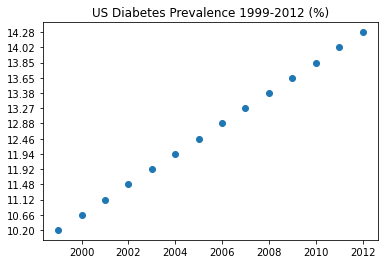

In [178]:
plt.scatter(years, dia_tots)
plt.title("US Diabetes Prevalence 1999-2012 (%)")

Pearson's Correlation: 0.8957455747531828
Wheat Pearson's Correlation: 0.8619825793130896


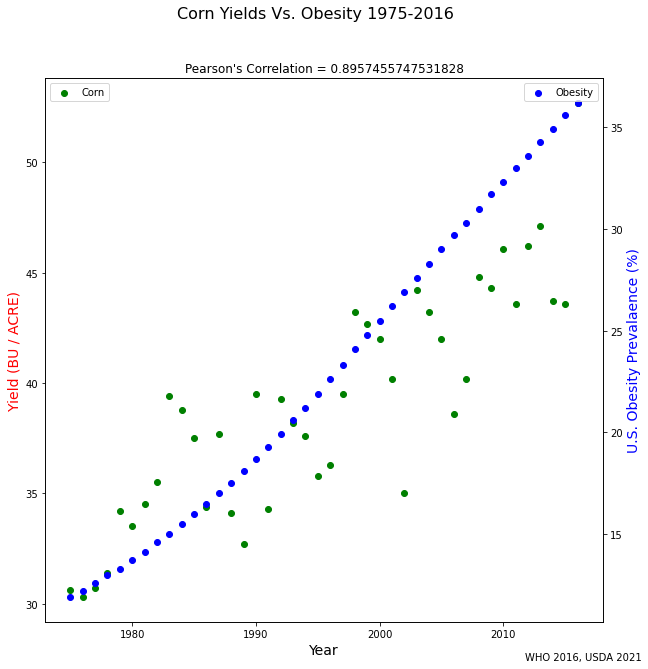

In [274]:
obesity = pd.read_csv("obesity_data.csv")
obesity.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
obesity = obesity[3:]
us_ob = obesity[obesity['Country']=='United States of America']
us_ob_y =[]
for name, data in us_ob.iteritems():
    us_ob_y.append(data.values[0])
    
us_ob_y = us_ob_list[1:]
for i, stat in enumerate(us_ob_y):
    stat = float(stat.split()[0])
    us_ob_y[i] = stat
us_ob_y.reverse()

corn = pd.read_csv("corn-yield.csv")
wheat = pd.read_csv("wheat-yield.csv")
wheat = wheat[(wheat['Year']>=1975) & (wheat['Year']<=2016)]
corn = corn[(corn['Year']>=1975) & (corn['Year']<=2016)]
wheat_y = wheat['WHEAT - YIELD, MEASURED IN BU / ACRE  -  <b>VALUE</b>']
corn_y = corn['CORN, GRAIN - YIELD, MEASURED IN BU / ACRE  -  <b>VALUE</b>']
corn_y = corn_y.to_numpy()
x = corn['Year']

fig, ax = plt.subplots()
fig.set_size_inches((10,10))
# ax.scatter(x,corn_y, color='red')
ax.scatter(x, wheat_y, color='green')
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Yield (BU / ACRE)",color="red",fontsize=14)

x = np.arange(1975,2017,1)
ax2 = ax.twinx()
ax2.scatter(x,us_ob_y, color='blue')
ax2.set_ylabel("U.S. Obesity Prevalaence (%)",fontsize=14, color='blue')

ax.annotate('WHO 2016, USDA 2021', (0,0),(480,-30), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')
ax.legend(['Corn', 'Wheat'], loc='upper left')
ax2.legend(['Obesity'])

np.cov(us_ob_y, np.flip(corn_y))
corn_corr, _ = stats.pearsonr(us_ob_y, np.flip(corn_y))
wheat_corr, _ = stats.pearsonr(us_ob_y, np.flip(wheat_y))
plt.suptitle("Corn Yields Vs. Obesity 1975-2016", fontsize=16)
plt.title(f"Pearson's Correlation = {corn_corr}")
print(f"Pearson's Correlation: {corn_corr}")
print(f"Wheat Pearson's Correlation: {wheat_corr}")

In [181]:
locale.setlocale(locale.LC_NUMERIC, '')


crops = pd.read_csv('crop_cash_receipts.csv')
headers = crops.iloc[1]
crops = crops[4:27]
crops.columns = headers
crops.dropna(axis=1,how='all')
crops = crops[crops['United States'].notna()]
crops = crops.T
crops.columns = crops.iloc[0]
crops = crops[1:]
crops.dropna(axis=0, how='all',inplace=True)

for i, row in crops.iterrows():
    crops.loc[i] = crops.loc[i].astype(str).apply(locale.atof)
crops.drop(['All commodities','Animals and products','Meat animals','Broilers','Crops','Food grains','Feed crops'],axis=1,inplace=True)
crops


United States,Cattle and calves,Hogs,"Dairy products, Milk",Poultry and eggs,Miscellaneous animals and products,Rice,Wheat,Corn,Cotton,Tobacco,Oil crops,Vegetables and melons,Fruits and nuts,All other crops
1,,,,,,,,,,,,,,
1910,851000,670000,597000,484000,144000,NaN,NaN,NaN,880000,102000,38000,271000,243000,262000
1911,784000,617000,577000,452000,150000,NaN,NaN,NaN,855000,96000,43000,306000,283000,281000
1912,885000,647000,630000,482000,160000,NaN,NaN,NaN,852000,108000,49000,363000,295000,275000
1913,999000,741000,669000,479000,158000,NaN,NaN,NaN,968000,135000,37000,294000,264000,275000
1914,985000,713000,667000,500000,156000,NaN,NaN,NaN,602000,99000,31000,318000,300000,278000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,6.69367e+07,2.1038e+07,3.79407e+07,4.27879e+07,6.85642e+06,2.42328e+06,8.70347e+06,4.55547e+07,7.57359e+06,1.3787e+06,4.10939e+07,2.04945e+07,3.05889e+07,2.86163e+07
2018,6.70381e+07,2.08813e+07,3.52423e+07,4.62383e+07,6.93061e+06,2.51836e+06,9.51458e+06,4.85961e+07,7.48437e+06,1.24689e+06,3.94679e+07,1.84994e+07,2.92045e+07,2.97333e+07
2019,6.6239e+07,2.20152e+07,4.04984e+07,4.03597e+07,6.88114e+06,2.75218e+06,8.67582e+06,4.93613e+07,7.18186e+06,1.00393e+06,3.6375e+07,1.88953e+07,2.87687e+07,3.06633e+07


Text(0, 0.5, 'Crop Receipts ($100,000,000)')

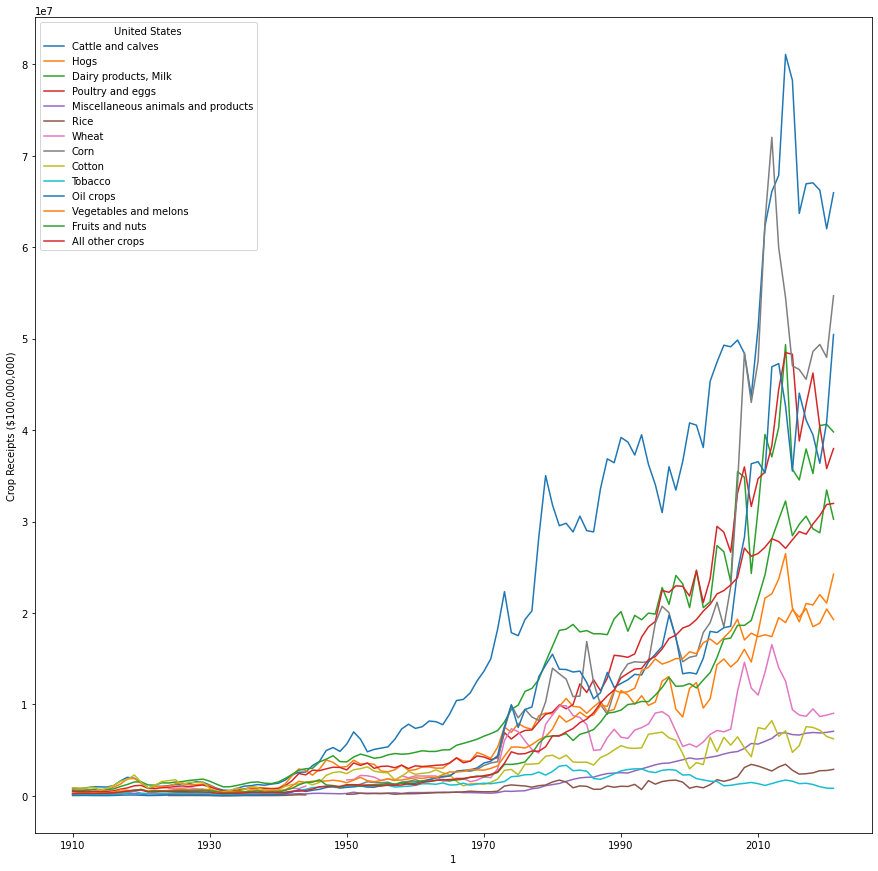

In [182]:
crops.plot(legend=True)
fig = plt.gcf()
aplt.ylabel('Crop Receipts ($100,000,000)')

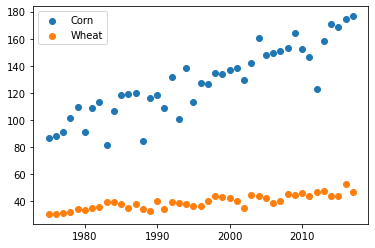

In [275]:
corn = pd.read_csv("corn-yield.csv")
wheat = pd.read_csv("wheat-yield.csv")
wheat = wheat[(wheat['Year']>=1975) & (wheat['Year']<=2017)]
corn = corn[(corn['Year']>=1975) & (corn['Year']<=2017)]
wheat_y = wheat['WHEAT - YIELD, MEASURED IN BU / ACRE  -  <b>VALUE</b>']
corn_y = corn['CORN, GRAIN - YIELD, MEASURED IN BU / ACRE  -  <b>VALUE</b>']
x = corn['Year']
plt.scatter(x,corn_y)
plt.scatter(x, wheat_y)
plt.legend(['Corn', 'Wheat'])